In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapoint = 32
latency = datapoint
bitfit_latency = latency * 0.5
freeze_latency = latency * 4 / 24

comm = 1000
bitfit_comm = comm * 0.001
freeze_comm = comm * 4 / 24

# [full, freeze, bitfit]
epoch_comm = {
    "tx2+high": np.array([comm, freeze_comm, bitfit_comm]) / 10 / 60,
    "tx2+low": np.array([comm, freeze_comm, bitfit_comm]) / 1 / 60,
    "rpi+high": np.array([comm, freeze_comm, bitfit_comm]) / 10 / 60,
    "rpi+low": np.array([comm, freeze_comm, bitfit_comm]) / 1 / 60
}

epoch_comp = {
    "tx2+high": np.array([latency, freeze_latency, bitfit_latency]) / 60 ,
    "tx2+low": np.array([latency, freeze_latency, bitfit_latency]) / 60,
    "rpi+high": np.array([latency, freeze_latency, bitfit_latency]) * 15 / 60,
    "rpi+low": np.array([latency, freeze_latency, bitfit_latency]) * 15 / 60
}

print(epoch_comm)
print(epoch_comp)
print("tx2+high", epoch_comm["tx2+high"] + epoch_comp["tx2+high"])
print("tx2+low", epoch_comm["tx2+low"] + epoch_comp["tx2+low"])
print("rpi+high", epoch_comm["rpi+high"] + epoch_comp["rpi+high"])
print("rpi+low", epoch_comm["rpi+low"] + epoch_comp["rpi+low"])

{'tx2+high': array([1.66666667, 0.27777778, 0.00166667]), 'tx2+low': array([1.66666667e+01, 2.77777778e+00, 1.66666667e-02]), 'rpi+high': array([1.66666667, 0.27777778, 0.00166667]), 'rpi+low': array([1.66666667e+01, 2.77777778e+00, 1.66666667e-02])}
{'tx2+high': array([0.53333333, 0.08888889, 0.26666667]), 'tx2+low': array([0.53333333, 0.08888889, 0.26666667]), 'rpi+high': array([8.        , 1.33333333, 4.        ]), 'rpi+low': array([8.        , 1.33333333, 4.        ])}
tx2+high [2.2        0.36666667 0.26833333]
tx2+low [17.2         2.86666667  0.28333333]
rpi+high [9.66666667 1.61111111 4.00166667]
rpi+low [24.66666667  4.11111111  4.01666667]


In [3]:
2.2 / 0.268333

8.19876794878006

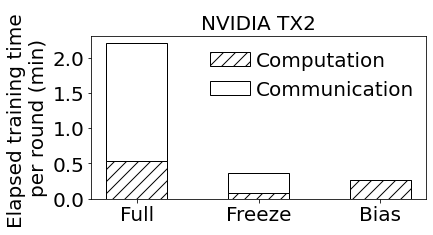

In [4]:
bar_confs_comm = {
        "color": ["white", "white", "white"],
        "linewidth": 1,
        "hatch": ["", "", ""],
        "edgecolor": "black",
    }

bar_confs_comp = {
    "color": ["white", "white", "white"],
    "linewidth": 1,
    "hatch": ["//", "//", "//"],
    "edgecolor": "black",
}

fig = plt.figure(figsize = (6,3))
plt.title("NVIDIA TX2",fontsize=20)
plt.ylabel("Elapsed training time \nper round (min)",fontsize=20)
bar_width = 0.03
x = [0.1, 0.1+bar_width*2, 0.1+bar_width*4]
methods = ["Full", "Freeze", "Bias"]
plt.bar(x, epoch_comp['tx2+high'], width=bar_width, **bar_confs_comp, label = 'Computation')
bottom = epoch_comp['tx2+high']
plt.bar(x, epoch_comm['tx2+high'], bottom=bottom, width=0.03, **bar_confs_comm, label = 'Communication')

plt.yticks(fontsize=20)
plt.xticks(x,methods,fontsize=20)

plt.legend(ncol=1, loc="lower left", bbox_to_anchor=(0.3, 0.5),frameon=False,fontsize=20,columnspacing = 1.0,handletextpad=0.3)

plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/bitfit/breakdown-new-tx2.pdf', bbox_inches="tight")

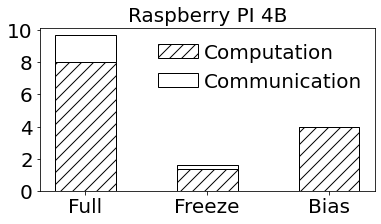

In [5]:
bar_confs_comm = {
        "color": ["white", "white", "white"],
        "linewidth": 1,
        "hatch": ["", "", ""],
        "edgecolor": "black",
    }

bar_confs_comp = {
    "color": ["white", "white", "white"],
    "linewidth": 1,
    "hatch": ["//", "//", "//"],
    "edgecolor": "black",
}

fig = plt.figure(figsize = (6,3))
plt.title("Raspberry PI 4B",fontsize=20)
# plt.ylabel("Elapsed training time \nper epoch (min)",fontsize=15)
bar_width = 0.03
x = [0.1, 0.1+bar_width*2, 0.1+bar_width*4]
methods = ["Full", "Freeze", "Bias"]
plt.bar(x, epoch_comp['rpi+high'], width=bar_width, **bar_confs_comp, label = 'Computation')
bottom = epoch_comp['rpi+high']
plt.bar(x, epoch_comm['rpi+high'], bottom=bottom, width=0.03, **bar_confs_comm, label = 'Communication')

plt.yticks(fontsize=20)
plt.xticks(x,methods,fontsize=20)

plt.legend(ncol=1, loc="lower left", bbox_to_anchor=(0.3, 0.5),frameon=False,fontsize=20,columnspacing = 1.0,handletextpad=0.3)

plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/bitfit/breakdown-new-rpi.pdf', bbox_inches="tight")

In [6]:
epoch_comp['rpi+high']

array([8.        , 1.33333333, 4.        ])

In [7]:
epoch_comm['rpi+high']

array([1.66666667, 0.27777778, 0.00166667])